# INTRODUCTION

# Business Task:

How to **cluster** customer data for marketing campaign?

# Data Source:

https://www.kaggle.com/loveall/clicks-conversion-tracking

# Data Content:

The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables:

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

# Method of clustering:

K-MEANS ALGORITHM

# Method of finding optimal number of clusters:

ELBOW METHOD

# Method of dimensionality reduction:

1.) PCA - PRINCIPAL COMPONENT ANALYSIS
2.) AUTOENCODERS - ANN UNSUPERVISED TRAINING

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DataSet

In [ ]:
training_set = pd.read_csv('KAG_conversion_data.csv')

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
training_set.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
training_set.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
training_set.columns.unique()

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

# Exploring and Visualizing the DataSet

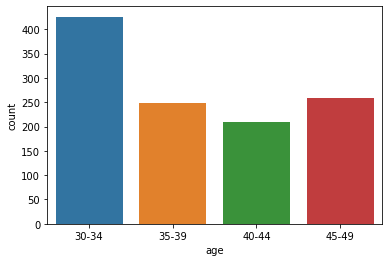

In [ ]:
# Perfoming some of countplots
sns.countplot(x='age', data=training_set)

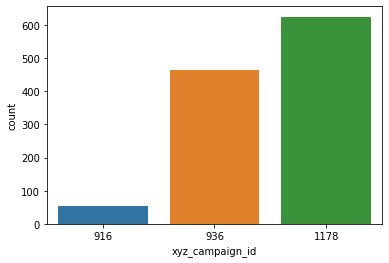

In [ ]:
sns.countplot(x='xyz_campaign_id', data=training_set)

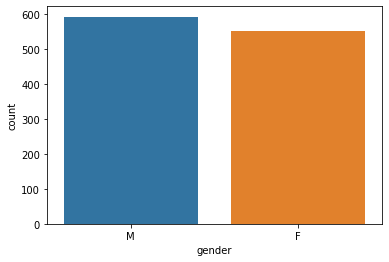

In [ ]:
sns.countplot(x='gender', data=training_set)

<Figure size 720x720 with 0 Axes>

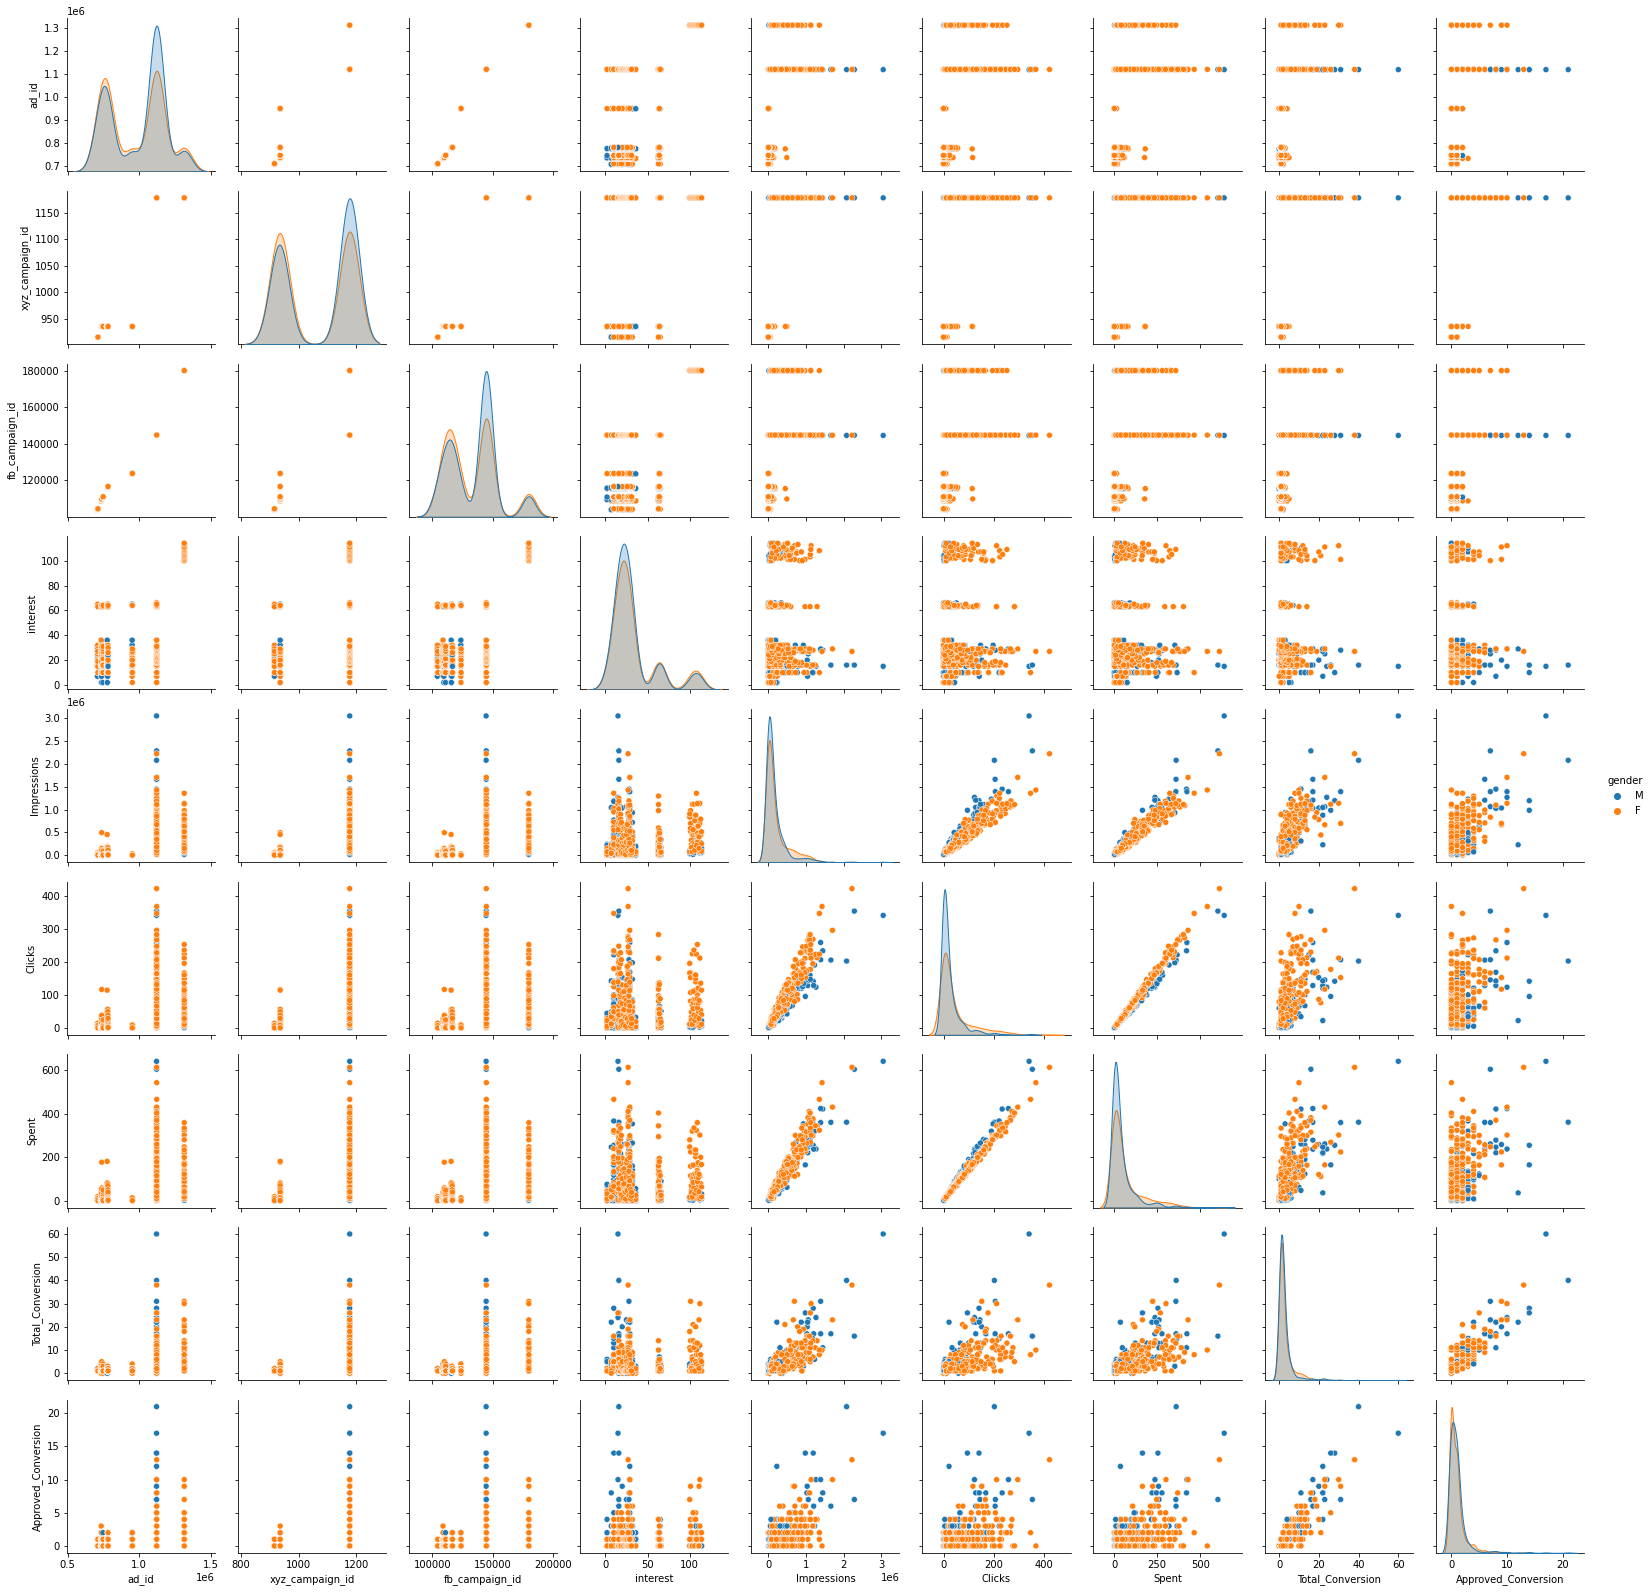

In [ ]:
# Showing the pairplot for data set
plt.figure(figsize = (10, 10))
sns.pairplot(training_set, hue='gender')

In [ ]:
# Changing the labels of 'gender'
training_set['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
gender_labels = training_set['gender'].values

In [ ]:
gender_labels[gender_labels == 'M'] = 1

In [ ]:
gender_labels[gender_labels == 'F'] = 0

In [ ]:
training_set['gender'].unique()

array([1, 0], dtype=object)

In [ ]:
# Changing the labels of 'age'
training_set['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [ ]:
age_labels = training_set['age'].values

In [ ]:
age_labels[age_labels == '30-34'] = 32

In [ ]:
age_labels[age_labels == '35-39'] = 37

In [ ]:
age_labels[age_labels == '40-44'] = 42

In [ ]:
age_labels[age_labels == '45-49'] = 47

In [ ]:
age_labels

array([32, 32, 32, ..., 47, 47, 47], dtype=object)

In [ ]:
# Converting into numeric dtype
training_set['age']= pd.to_numeric(training_set['age'])

In [ ]:
training_set['gender']= pd.to_numeric(training_set['gender'])

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   int64  
 4   gender               1143 non-null   int64  
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 98.4 KB


In [ ]:
training_set.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id'],axis=1,inplace=True)

In [ ]:
training_set.head(3)

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,32,1,15,7350,1,1.43,2,1
1,32,1,16,17861,2,1.82,2,0
2,32,1,20,693,0,0.00,1,0


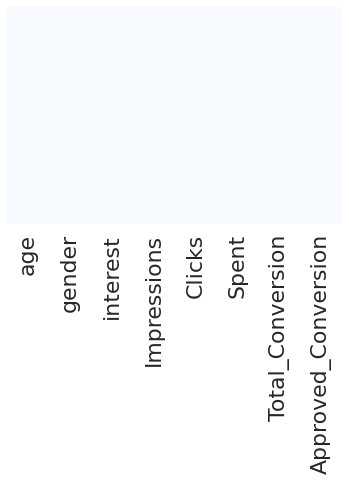

In [ ]:
# Checking the NaN values
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

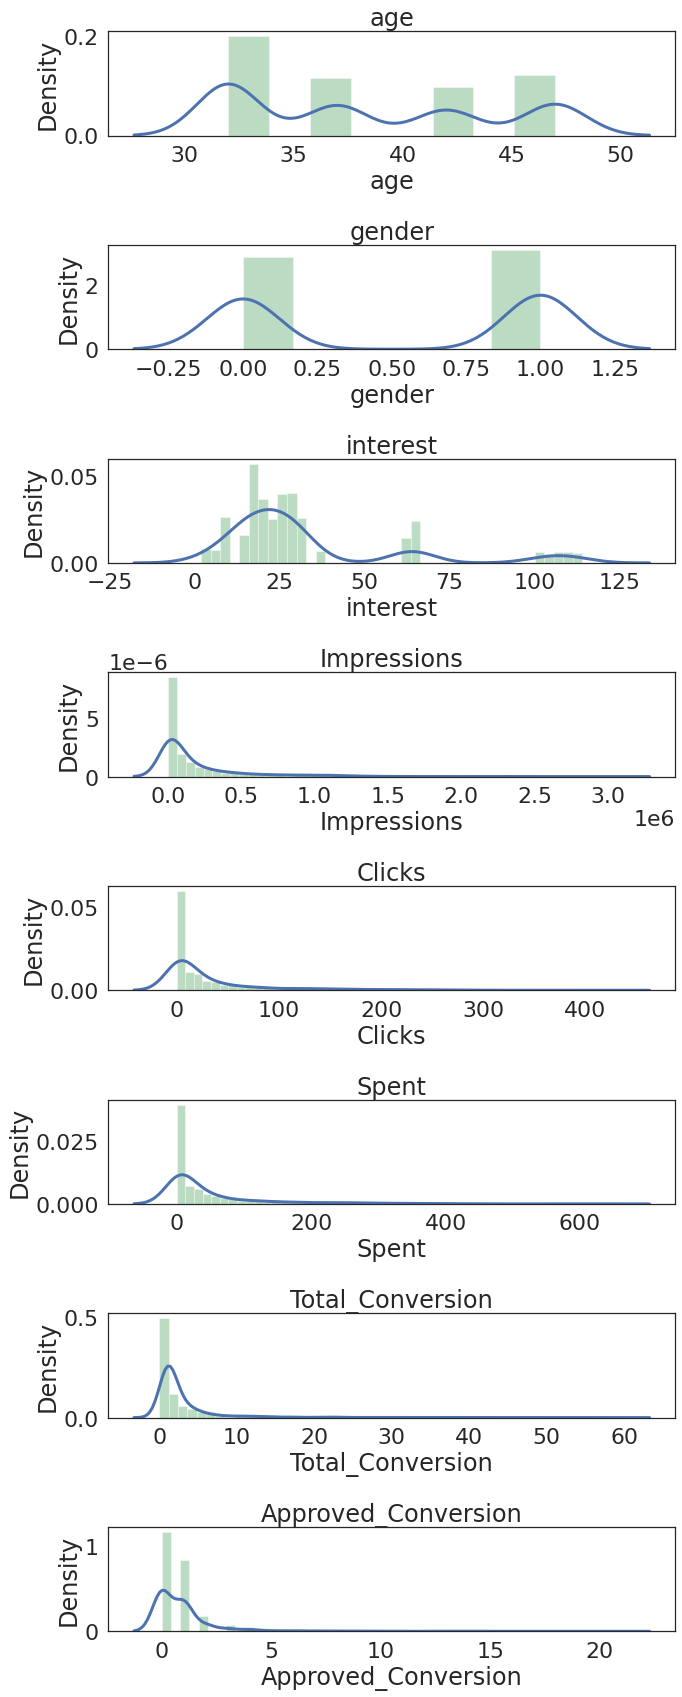

In [ ]:
# Combining the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize=(10,50))
for i in range(len(training_set.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(training_set[training_set.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(training_set.columns[i])

plt.tight_layout();

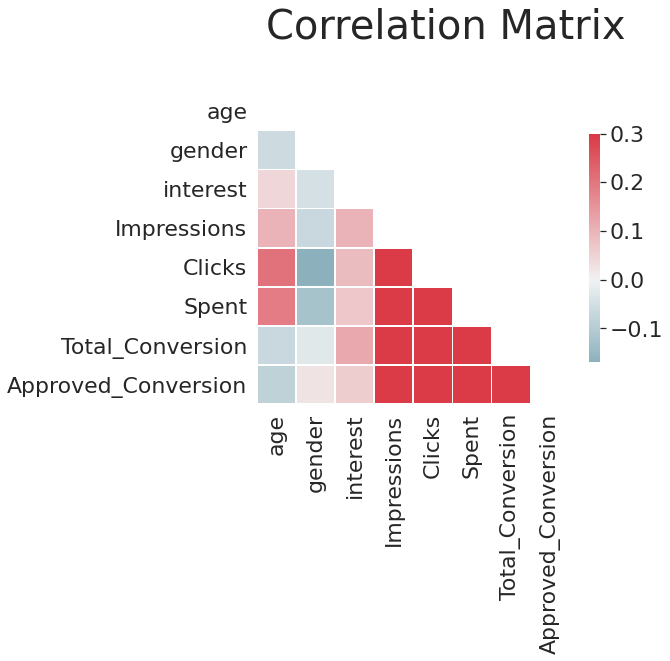

In [ ]:
# Analyzing the correlation matrix
sns.set(style="white", font_scale=2)

corr = training_set.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 7))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})

# K-MEANS Clustering

In [ ]:
# Scaling the data first
scaler = StandardScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[-1.07113704,  0.96475035, -0.6594722 , ..., -0.57477185,
        -0.19092221,  0.03223643],
       [-1.07113704,  0.96475035, -0.62235314, ..., -0.57028241,
        -0.19092221, -0.54348614],
       [-1.07113704,  0.96475035, -0.47387691, ..., -0.59123316,
        -0.41405523, -0.54348614],
       ...,
       [ 1.47068228, -1.03653758,  2.90395744, ..., -0.12743878,
        -0.19092221, -0.54348614],
       [ 1.47068228, -1.03653758,  2.97819555, ...,  1.69619753,
         1.14787588,  0.60795901],
       [ 1.47068228, -1.03653758,  3.01531461, ...,  1.31517011,
         0.47847683,  0.60795901]])

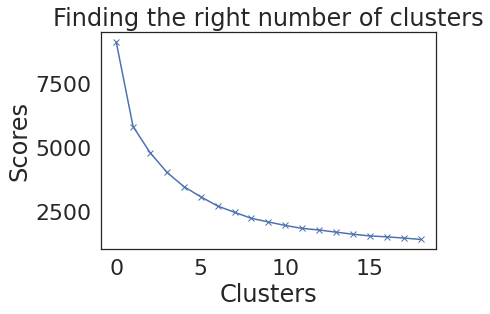

In [ ]:
# Finding of potential number of clusters
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(training_set_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [ ]:
# Applying K-Means algorithm
kmeans = KMeans(5)
kmeans.fit(training_set_scaled)
labels = kmeans.labels_

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [training_set.columns])
cluster_centers    

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,-0.075686,0.964750,-0.434428,-0.299843,-0.337502,-0.317856,-0.246956,-0.192373
1,-0.380766,0.297654,0.051289,3.514048,2.757848,3.006647,4.808910,4.851248
2,-0.029036,0.044372,1.776292,-0.189582,-0.238754,-0.250512,-0.158705,-0.137094
3,0.468690,-0.566670,0.199108,1.873277,2.110339,2.046503,1.029518,0.678047
4,-0.012046,-1.036538,-0.442104,-0.383489,-0.331462,-0.347602,-0.294606,-0.265012


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [training_set.columns])
cluster_centers

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,37.874439,1.000000e+00,21.062780,9.299349e+04,14.197309,23.748341,1.748879,0.609865
1,36.074074,6.666667e-01,34.148148,1.285312e+06,190.222222,312.549259,24.407407,9.370370
2,38.149733,5.401070e-01,80.620321,1.274639e+05,19.812834,29.598610,2.144385,0.705882
3,41.086957,2.347826e-01,38.130435,7.723660e+05,153.400000,229.141217,7.469565,2.121739
4,38.250000,1.998401e-15,20.855978,6.684362e+04,14.540761,21.164293,1.535326,0.483696


In [ ]:
y_kmeans = kmeans.fit_predict(training_set_scaled)
y_kmeans

array([0, 0, 0, ..., 4, 3, 4], dtype=int32)

In [ ]:
training_set_cluster = pd.concat([training_set, pd.DataFrame({'cluster':labels})], axis = 1)
training_set_cluster.head() # we can save this output

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cluster
0,32,1,15,7350,1,1.43,2,1,0
1,32,1,16,17861,2,1.82,2,0,0
2,32,1,20,693,0,0.00,1,0,0
3,32,1,28,4259,1,1.25,1,0,0
4,32,1,28,4133,1,1.29,1,1,0


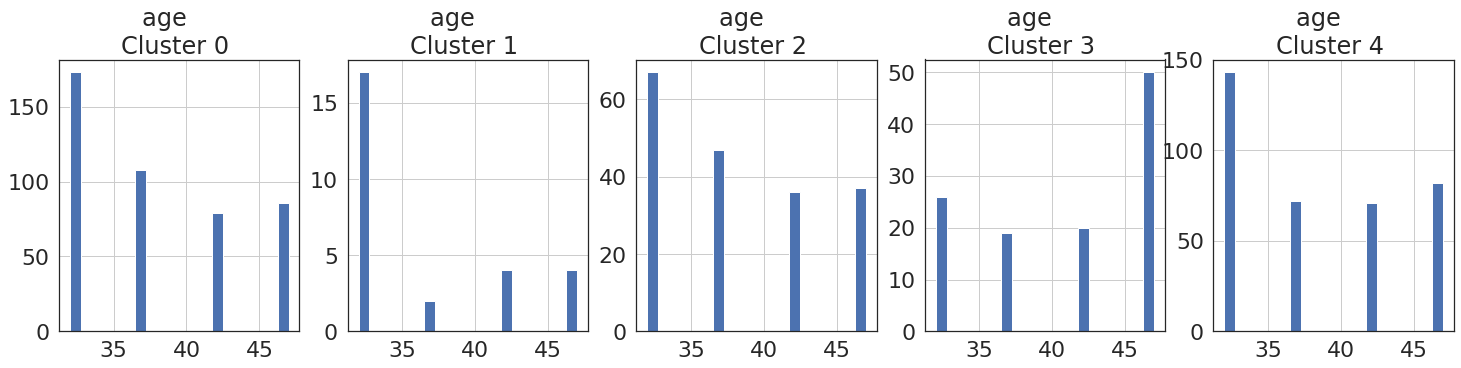

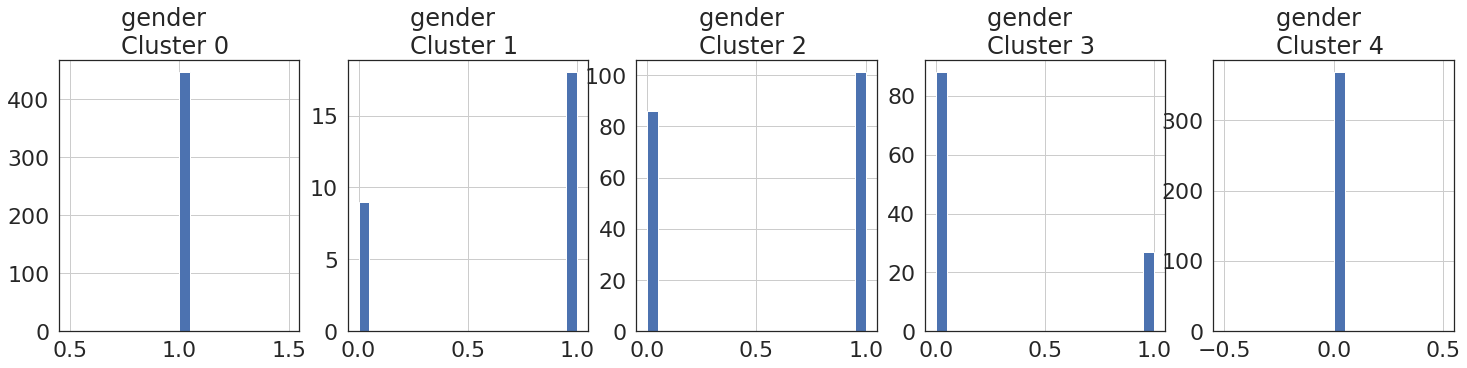

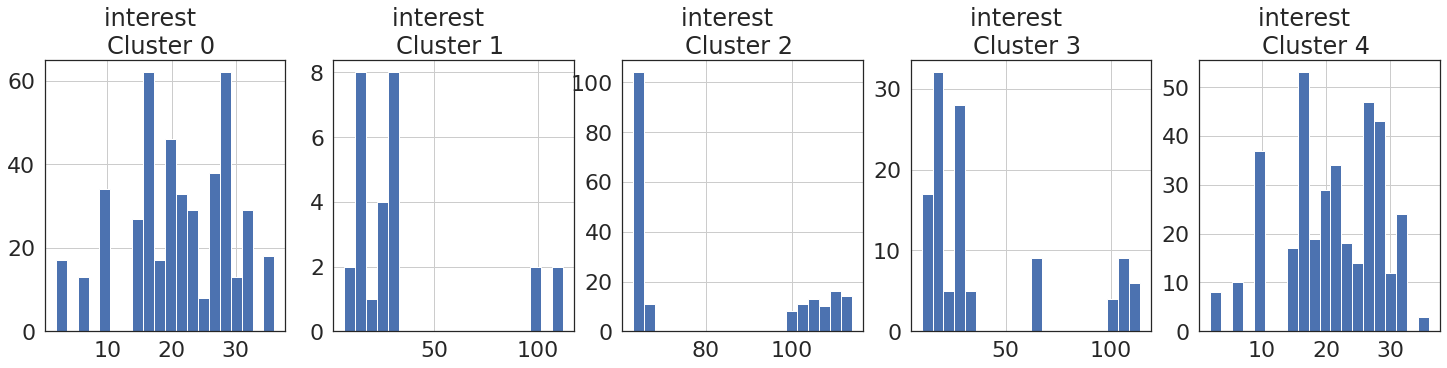

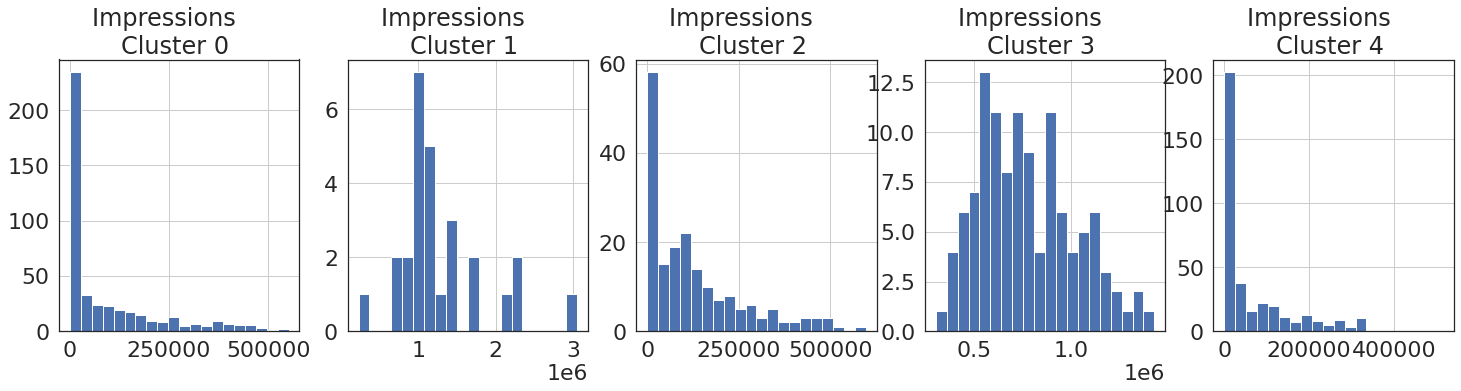

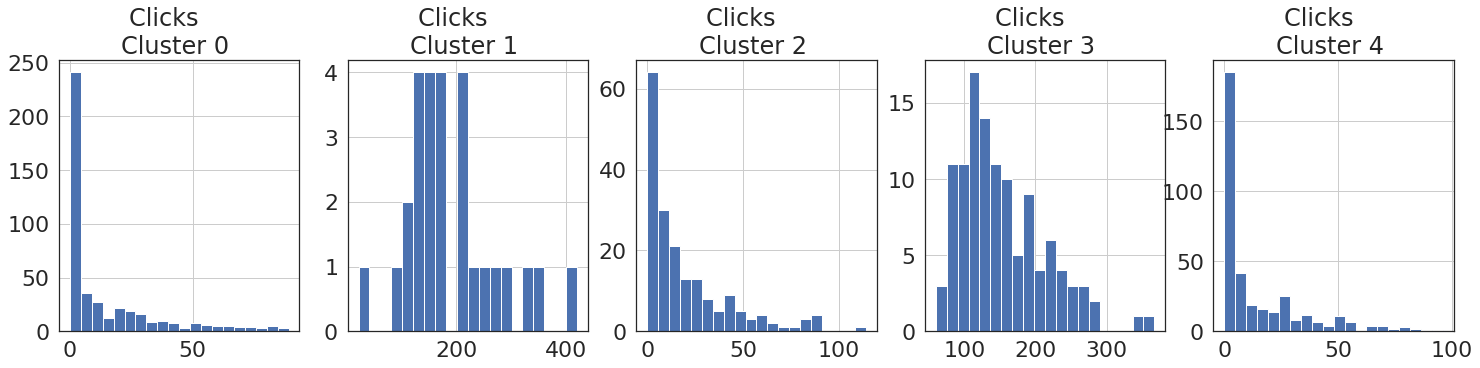

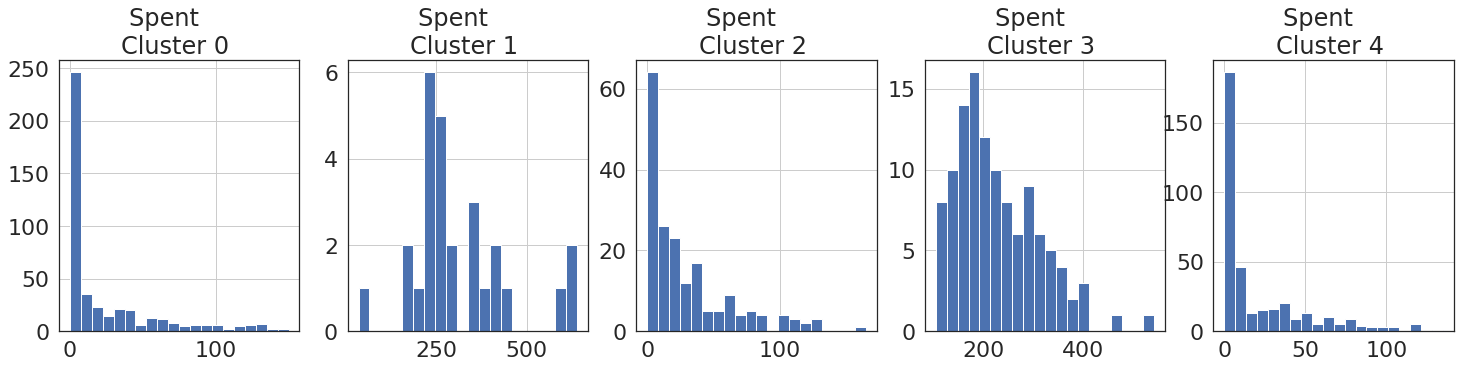

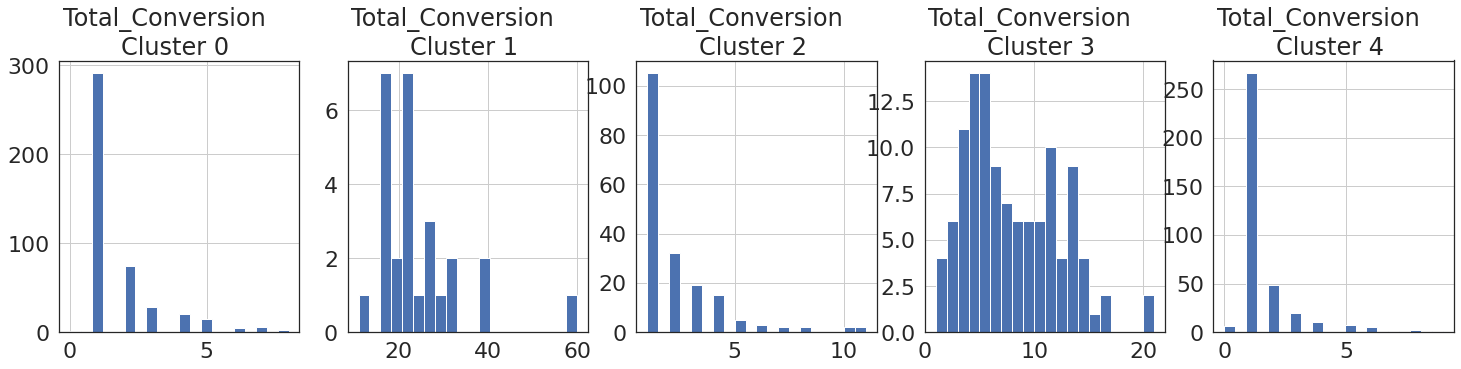

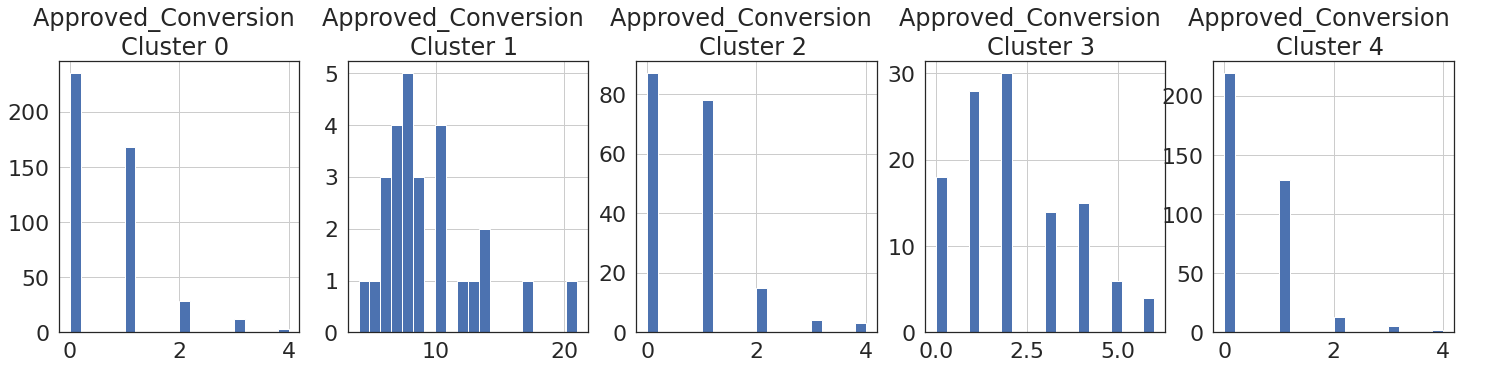

In [ ]:
# Plot the histogram of various clusters
for i in training_set.columns:
  plt.figure(figsize = (25, 5))
  for j in range(5):
    plt.subplot(1,5,j+1)
    cluster = training_set_cluster[training_set_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# Optimization of the solution (by using PCA)

In [ ]:
# Applying PCA (PRINCIPAL COMPONETNT ANALYSIS) - an unsupervised ML algorithm performs dimensionality reductions of the uncorrelated features

In [ ]:
# Obtaining the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(training_set_scaled)
principal_comp

array([[-1.02609264,  1.49715135],
       [-1.21992188,  1.29055433],
       [-1.35928983,  1.22200393],
       ...,
       [-0.12640267, -2.18984992],
       [ 3.58605099, -2.1389698 ],
       [ 2.52964458, -2.16940424]])

In [ ]:
# Creating a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.026093,1.497151
1,-1.219922,1.290554
2,-1.359290,1.222004
3,-1.320330,1.170251
4,-1.097979,1.366316


In [ ]:
# Concatenating the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.026093,1.497151,0
1,-1.219922,1.290554,0
2,-1.359290,1.222004,0
3,-1.320330,1.170251,0
4,-1.097979,1.366316,0


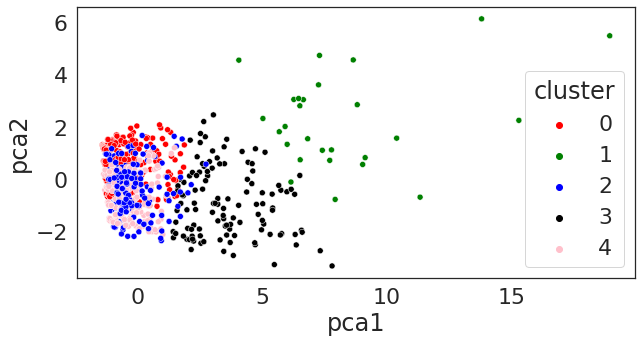

In [ ]:
# Ploting the result

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','black','pink'])
plt.show()

# Optimization of the solution (by using AUTOENCODERS - ANN)

In [ ]:
# Applying AUTOENCODERS and performing dimensionality reduction

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(8,)) # number of features


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(5, activation='relu', kernel_initializer = 'glorot_uniform')(x)  # number to reduction

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(8, kernel_initializer = 'glorot_uniform')(x) # number of features

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
autoencoder.fit(training_set_scaled, training_set_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
9/9 [==============================] - 1s 38ms/step - loss: 0.8623
Epoch 2/25
9/9 [==============================] - 0s 37ms/step - loss: 0.4987
Epoch 3/25
9/9 [==============================] - 0s 37ms/step - loss: 0.3499
Epoch 4/25
9/9 [==============================] - 0s 38ms/step - loss: 0.2535
Epoch 5/25
9/9 [==============================] - 0s 44ms/step - loss: 0.1874
Epoch 6/25
9/9 [==============================] - 0s 44ms/step - loss: 0.1616
Epoch 7/25
9/9 [==============================] - 0s 40ms/step - loss: 0.1333
Epoch 8/25
9/9 [==============================] - 0s 40ms/step - loss: 0.1288
Epoch 9/25
9/9 [==============================] - 0s 38ms/step - loss: 0.1125
Epoch 10/25
9/9 [==============================] - 0s 39ms/step - loss: 0.1112
Epoch 11/25
9/9 [==============================] - 0s 37ms/step - loss: 0.0961
Epoch 12/25
9/9 [==============================] - 0s 37ms/step - loss: 0.0988
Epoch 13/25
9/9 [==============================] - 0s 39ms/st

In [ ]:
autoencoder.save_weights('autoencoder_v3.h5')

In [ ]:
# Taking the autoencoder
pred = encoder.predict(training_set_scaled)
pred.shape

(1143, 5)

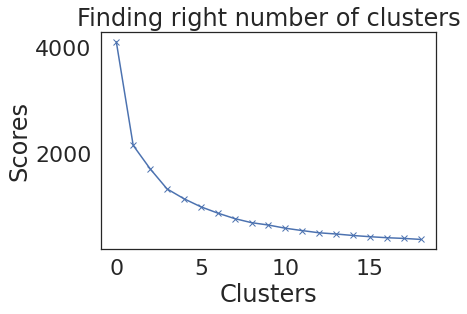

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

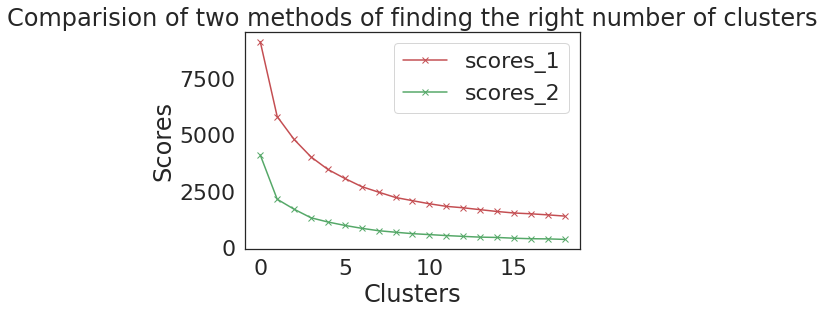

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r', label='scores_1')
plt.plot(scores_2, 'bx-', color = 'g', label='scores_2')

plt.title('Comparision of two methods of finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [ ]:
# Applying K-Means after dimensionality reduction
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(training_set_scaled)

In [ ]:
training_set_cluster_2 = pd.concat([training_set, pd.DataFrame({'cluster':labels})], axis = 1)
training_set_cluster_2.head() # we can save this output

,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cluster
0,32,1,15,7350,1,1.43,2,1,0
1,32,1,16,17861,2,1.82,2,0,0
2,32,1,20,693,0,0.00,1,0,0
3,32,1,28,4259,1,1.25,1,0,0
4,32,1,28,4133,1,1.29,1,1,0


In [ ]:
# Plot the histogram of various clusters
for i in training_set.columns:
  plt.figure(figsize = (35, 5))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = training_set_cluster_2[training_set_cluster_2['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [ ]:
# using again PCA to reduce the 'pred' data to 3 dimensions for visualizig the clusters
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(pred)
principal_comp


array([[-0.73834777,  0.23641327,  0.24666968],
       [-1.0583383 ,  0.15229872,  0.20478705],
       [-1.0918509 ,  0.16313109,  0.18586342],
       ...,
       [-0.323155  ,  1.4253569 , -0.7292162 ],
       [ 1.6295376 ,  2.09197   , -1.3172655 ],
       [ 0.90412354,  1.7505352 , -1.1199955 ]], dtype=float32)

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.738348,0.236413,0.246670
1,-1.058338,0.152299,0.204787
2,-1.091851,0.163131,0.185863
3,-1.108148,0.209649,0.151207
4,-0.784505,0.313836,0.178528


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head(3)

,pca1,pca2,pca3,cluster
0,-0.738348,0.236413,0.246670,0
1,-1.058338,0.152299,0.204787,0
2,-1.091851,0.163131,0.185863,0


In [ ]:
# Visualize clusters using 3D-Scatterplot

fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

# Done!